<a href="https://colab.research.google.com/github/RogCas/SIMULACION-II/blob/main/Tarea1_Classroom_Simulacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Ejercicio 5
Escriba un programa en Python para realizar la prueba x^2.

Usaremos las librerias

Numpy,matplot para graficar

scipy.stats para los datos de Chi Cuadrada

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

##Nuestras hipotesis seran
H0: No hay diferencia entre la distribucion de la muestra y la distribucion teorica

H1: No H0

##Seleccionar el nivel de aceptacion
Cargamos los datos

Ponemos la confianza que queremos y de ahi sacamos alpha

Alpha es el nivel de significancia

In [ ]:
# Ejemplos

confianza=.95
alpha1=1-confianza

#Ejercicio 3
# datos = [0.8797, 0.3884, 0.6289, 0.8750, 0.5999, 0.8589, 0.9996, 0.2415, 0.3808, 0.9606,
#          0.9848, 0.3469, 0.7977, 0.5844, 0.8147, 0.6431, 0.7387, 0.5613, 0.0318, 0.7401,
#          0.4557, 0.1592, 0.8536, 0.8846, 0.3410, 0.1492, 0.8681, 0.5291, 0.3188, 0.5992,
#          0.9170, 0.2204, 0.5991, 0.5461, 0.5739, 0.3254, 0.0856, 0.2258, 0.4603, 0.5027,
#          0.8376, 0.6235, 0.3681, 0.2088, 0.1525, 0.2006, 0.4720, 0.4272, 0.6360, 0.0954]

#Ejercicio 4
datos =[38, 33, 25, 5, 69, 35, 98, 52, 12, 79,50, 46, 95, 42, 49, 11, 78, 34, 2, 43,7, 50, 5, 91, 77, 18, 21, 4, 17, 62,91, 36, 48, 88, 52, 76, 99, 73, 82, 90]

##Verificar si algun dato es menor a 1

En esta parte, hice que verifiquemos si algun dato es menor a 1

Si hay aunque sea un numero mayor a 1
Se busca el numero mas grande de la lista y se divide con la potencia mas cercana de 10 pero siempre hacia arriba


*es decir si un dato es 4 se dividira entre 10*


*es decir si un dato es 54 se dividira entre 100*


*es decir si un dato es 101 se dividira entre 1000*


Esto lo hice para que siempre trabajemos con datos entre 0 y 1 (veremos por que es mas practico)

In [ ]:
# Verificar si algún elemento es mayor que 1
if any(num > 1 for num in datos):
    divisor=max(datos)/10**len(str(max(datos)))
    datos = [num / (10**len(str(max(datos))))  for num in datos]


##Seleccionar el estadistico Chi Cuadrada (calculada)

Apartir de aqui es el codigo que usaremos para calcular el estadistico

Ponemos el numero de intervalos que queremos

Y sacamos el numero de datos

Esto lo hacemos para saber cuanto valen los intervalos (1/numero de intervalos)

Aqui nos damos cuenta que al trabajar con numeros del 0 al 1 es mas facil de donde a donde ira cada intervalo

Si el numero de intervalos es 5 y numero de datos es 40

Los intervalos iran de 1/5 (1/numero de intervalos) =0.2

Crearemos una lista con el nombre numeroObservado, esta sera nuestra columna (O_i) con los datos que tenemos

Para sacar este valor, primero creamos una lista de tamaño de los intervalos (5 elementos en este caso) y que todos sus elementos valgan 0

Despues con un ciclo for iremos iterendo los datos para saber cuantos datos hay en cada uno de los 5 intervalos y cada que encuentre un dato en un intervalo en especifico se le sumara uno al elemento en el que se encuentre

Es decir, si estamos en el intervalo 1 [0,.2) si vamos iterando y encontramos un dato en ese intervalo, el elemento 0 de la lista ahora sera 1, si encuentra otro el elemento 0 de la sera 2 , recorrera todos los datos y cuando se acaben los dato cambiaremos de itervalo que seria [2,.4) y repetieriamos el procedimiento hasta el 5 intervalo

Crearemos una lista con el nombre numeroEsperado, esta sera nuestra columna (E_i) con los datos que tenemos

Para sacar este valor, primero creamos una lista de tamaño de los intervalos (5 elementos en este caso) y que todos sus elementos valgan 40/5 (numero de Datos/numero de Intervalos) = 8

El numero de clases que tenemos es de 5 (numero de intervalos)

Y los grados de libertad que usaremos para calcular chi cuadrada con nivel de confianza .95 (alpha =0.05), seran el numero de clases (5 intervalos) - 1 = 4 grados de libertad


In [ ]:
numInter=5 #numero de intervalos
numDatos=len(datos) #numero de datos

numeroObservado=[0]*numInter
j=(1/numInter)

numeroEsperado=[numDatos/numInter]*numInter
# Iterar sobre los datos y contar en cada rango
for i in range(numInter):

  for dato in datos:

      if 0 + i*j <= dato < j + i*j:

        numeroObservado[i] += 1

n=numInter #numero de clases
gradosLibertad=n-1


Crearemos una lista con el nombre oE, esta sera nuestra columna (O_i-Ei) con los datos que tenemos

In [ ]:
oE=[]
for i in range(len(numeroObservado)):
    resultado = numeroObservado[i] - numeroEsperado[i]
    oE.append(resultado)

Crearemos una lista con el nombre oE, esta sera nuestra columna ((O_i-E_i)^2/E_i) con los datos que tenemos

Y sacamos la suma de todos ellos para obtener la Chi Calculada

In [ ]:
oEcuadrado= [(x**2)/numeroEsperado[0] for x in oE]
chiCalculada=sum(oEcuadrado)

##Calculamos el valor crítico de la Chi Cuadrada

In [ ]:
# Calcular el valor crítico
chi=chi2.ppf(confianza, gradosLibertad)

#me da el valor critico usando las tablas de chi cuadrada
#chi2.ppf (nivel de confianza, grados de libertad)

##Comprobacion de H0
Vemos si Chi Calculada es menor que Chi Cuadrada, para ver si rechazamos h0 o no

In [ ]:
if chiCalculada < chi:
  print("\nNo se rechaza H0, ya que X^2(calculada) < Valor Critico")
  print(chiCalculada, " < ", chi)
else:
  print("\nSe rechaza H0, ya que X^2(calculada) > Valor Critico")
  print(chiCalculada, " > ", chi)


No se rechaza H0, ya que X^2(calculada) < Valor Critico
0.5  <  9.487729036781154


##Graficamos

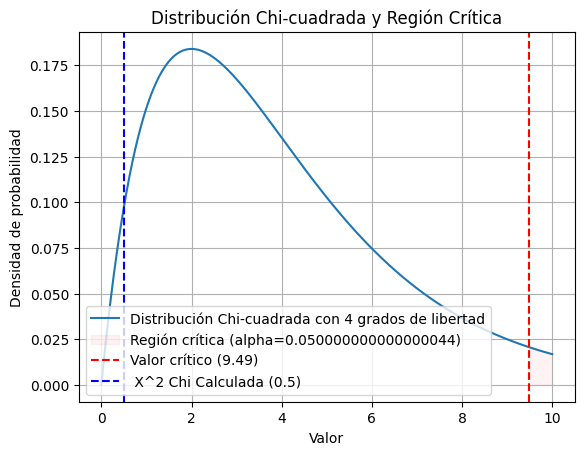

In [ ]:
# Generar datos de la distribución chi-cuadrada
x = np.linspace(0, 10, 1000)
y = chi2.pdf(x, gradosLibertad)

# Crear el gráfico
plt.plot(x, y, label=f'Distribución Chi-cuadrada con {gradosLibertad} grados de libertad')
plt.fill_between(x, y, where=(x > chi), color='red', alpha=alpha1, label=f'Región crítica (alpha={alpha1})')
plt.axvline(x=chi, color='red', linestyle='--', label=f'Valor crítico ({round(chi, 2)})')
plt.axvline(x=chiCalculada, color='blue', linestyle='--', label=f' X^2 Chi Calculada ({round(chiCalculada, 2)})')
plt.title('Distribución Chi-cuadrada y Región Crítica')
plt.xlabel('Valor')
plt.ylabel('Densidad de probabilidad')
plt.legend()
plt.grid(True)
plt.show()